<a href="https://colab.research.google.com/github/jamespan1118/Xenopus_signal_processing/blob/main/Monophasic_caller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [21]:
short_ratio = []
long_ratio = []

###Poweri

In [44]:
path = '/content/drive/MyDrive/New_SURF_data/James_analyses_post_powerii/'

less_than_one_IPI_counter = 0
IPI_short_counter = 0
IPI_long_counter = 0
short_call, short_silence, long_call, long_silence = 0, 0, 0, 0

for filename in os.listdir(path):
  if filename.endswith('_femaleipi.csv') and filename.startswith('01'):
    df = pd.read_csv(path+filename,index_col=0)
    df['sec_diff_1'] = df['sec'].diff(periods=1)
    df['sec_diff_2'] = df['sec'].diff(periods=-1)
    for index, row in df.iterrows():
      #check call type
      if abs(row['sec_diff_1'])<1 or abs(row['sec_diff_2'])<1:
        less_than_one_IPI_counter+=1
        if abs(row['sec_diff_1'])<0.2 or abs(row['sec_diff_2'])<0.2:
          IPI_short_counter+=1
          if row['type'] == 'Call':
            short_call +=1
          else:
            short_silence +=1
        else:
          IPI_long_counter+=1
          if row['type'] == 'Call':
            long_call +=1
          else:
            long_silence +=1
        

In [45]:
print(
"""
less_than_one_IPI_counter: {0}
IPI_short_counter: {1}
IPI_long_counter: {2}
short_call: {3}
short_silence: {4}
long_call: {5}
long_silence: {6}
""".format(
    less_than_one_IPI_counter,
    IPI_short_counter,
    IPI_long_counter,
    short_call, short_silence, long_call, long_silence
)
)


less_than_one_IPI_counter: 28494
IPI_short_counter: 8713
IPI_long_counter: 19781
short_call: 2268
short_silence: 6445
long_call: 2721
long_silence: 17060



In [28]:
short_ratio.append(short_call/IPI_short_counter)
long_ratio.append(long_call/IPI_long_counter)

print(short_ratio, long_ratio)

[0.2603007001032939, 0.05509573810994441, 0.2163471449185735] [0.13755624083716697, 0.016495620869378325, 0.21238041643218908]


In [39]:
short_ratio = [0.2603007001032939, 0.2163471449185735] 
long_ratio = [0.13755624083716697, 0.21238041643218908]

In [40]:
short_ratio_reverse = [1 - i for i in short_ratio]
long_ratio_reverse = [1 - i for i in long_ratio]

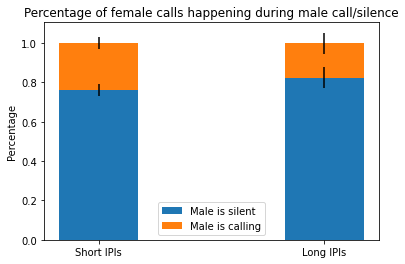

In [46]:
labels = ['Short IPIs', 'Long IPIs']
overlap = [statistics.mean(short_ratio), statistics.mean(long_ratio)]
not_overlap = [statistics.mean(short_ratio_reverse), statistics.mean(long_ratio_reverse)]
overlap_std = [statistics.stdev(short_ratio), statistics.stdev(long_ratio)]
notoverlap_std = [statistics.stdev(short_ratio_reverse), statistics.stdev(long_ratio_reverse)]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, not_overlap, width, yerr=notoverlap_std, label='Male is silent')
ax.bar(labels, overlap, width, yerr=overlap_std, bottom=not_overlap,
       label='Male is calling')

ax.set_ylabel('Percentage')
ax.set_title('Percentage of female calls happening during male call/silence')
ax.legend()

plt.show()

###Vic

In [126]:
path = '/content/drive/MyDrive/New_SURF_data/James_analyses_post_vict'
short_ratio_vic = []
long_ratio_vic = []

In [128]:
less_than_one_IPI_counter = 0
IPI_short_counter = 0
short_call, short_silence = 0, 0

for filename in os.listdir(path):
  if filename.endswith('_femaleipi.csv') and filename.startswith('01'):
    df = pd.read_csv(path+'/'+filename,index_col=0)
    df['sec_diff_1'] = df['sec'].diff(periods=1)
    df['sec_diff_2'] = df['sec'].diff(periods=-1)
    for index, row in df.iterrows():
      #check call type
      if abs(row['sec_diff_1'])<0.3 or abs(row['sec_diff_2'])<0.3:
        IPI_short_counter+=1
        if row['type'] == 'Call':
          short_call +=1
        else:
          short_silence +=1

In [129]:
print(
"""
less_than_one_IPI_counter: {0}
IPI_short_counter: {1}
short_call: {2}
short_silence: {3}
""".format(
    less_than_one_IPI_counter,
    IPI_short_counter,
    short_call, short_silence
)
)


less_than_one_IPI_counter: 0
IPI_short_counter: 473
short_call: 16
short_silence: 457



In [83]:
short_ratio.append(short_call/IPI_short_counter)

print(short_ratio)

[0.03382663847780127, 0.6278703994966971, 0.2011617900172117]


In [86]:
short_ratio_vic = short_ratio
short_ratio_reverse_vic = [1 - i for i in short_ratio_vic]

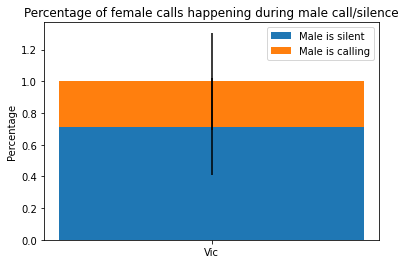

In [87]:
labels = ['Vic']
overlap_vic = [statistics.mean(short_ratio_vic)]
not_overlap_vic = [statistics.mean(short_ratio_reverse_vic)]
overlap_std_vic = [statistics.stdev(short_ratio_vic)]
notoverlap_std_vic = [statistics.stdev(short_ratio_reverse_vic)]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, not_overlap_vic, width, yerr=notoverlap_std_vic, label='Male is silent')
ax.bar(labels, overlap_vic, width, yerr=overlap_std_vic, bottom=not_overlap_vic,
       label='Male is calling')

ax.set_ylabel('Percentage')
ax.set_title('Percentage of female calls happening during male call/silence')
ax.legend()

plt.show()

###Combined Bar Plot

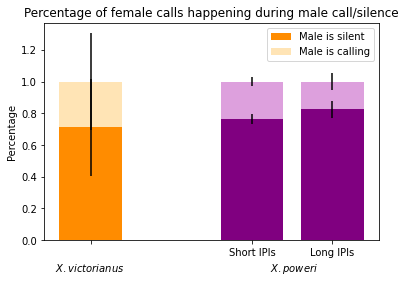

In [125]:
short_ratio = [0.2603007001032939, 0.2163471449185735] 
long_ratio = [0.13755624083716697, 0.21238041643218908]
short_ratio_reverse = [1 - i for i in short_ratio]
long_ratio_reverse = [1 - i for i in long_ratio]

x = [0,0.9,1.35]
color_bottom = ['darkorange','purple','purple']
color_up = ['moccasin','plum','plum']

overlap = [statistics.mean(short_ratio_vic), statistics.mean(short_ratio), statistics.mean(long_ratio)]
not_overlap = [statistics.mean(short_ratio_reverse_vic), statistics.mean(short_ratio_reverse), statistics.mean(long_ratio_reverse)]
overlap_std = [statistics.stdev(short_ratio_vic), statistics.stdev(short_ratio), statistics.stdev(long_ratio)]
notoverlap_std = [statistics.stdev(short_ratio_reverse_vic), statistics.stdev(short_ratio_reverse), statistics.stdev(long_ratio_reverse)]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(x, not_overlap, width, yerr=notoverlap_std, label='Male is silent',color=color_bottom)
ax.bar(x, overlap, width, yerr=overlap_std, bottom=not_overlap,
       label='Male is calling',color=color_up)

ax.set_ylabel('Percentage')
ax.set_title('Percentage of female calls happening during male call/silence')
plt.xticks(x,['','Short IPIs', 'Long IPIs'])
ax.annotate("$X. poweri$",[1,1],xytext=(1,-0.2))
ax.annotate("$X. victorianus$",[1,1],xytext=(-0.2,-0.2))
ax.legend()

plt.show()